<center style="font-family:cursive;"><h1 style="font-size:350%; padding: 20px; background: #001f3f;"><b style="color:orange;">DRUGS REVIEW - SENTIMENT ANALYSIS</b></h1></center>

![](https://miro.medium.com/max/1250/1*fpKIE34xAR22c2Ti50OHqw.jpeg)

<center style="font-family:cursive;"><h1 style="font-size:200%; padding: 20px; background: #001f3f;"><b style="color:orange;">Let's Start the Implementation</b></h1></center>

<h1 style="font-size:200%; color:navy;"><i><b>Import Required Libraries and Load Dataset</b></i></h1>

In [60]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from textblob import TextBlob
from nltk.corpus import stopwords
import seaborn as sns

In [53]:
pip install textblob -q

Note: you may need to restart the kernel to use updated packages.


<h1 style="font-size:200%; color:navy;"><i><b>Descriptive Statistics</b></i></h1>

In [9]:
# Load the dataset
data = pd.read_csv("drugsComTrain_raw.csv")

In [54]:
# describing the data
data.describe()

,uniqueID,rating,usefulCount,Polarity,Subjectivity
count,161297.000000,161297.000000,161297.000000,161297.000000,161297.000000
mean,115923.585305,6.994377,28.004755,0.062340,0.492929
std,67004.445170,3.272329,36.403742,0.235984,0.185687
min,2.000000,1.000000,0.000000,-1.000000,0.000000
25%,58063.000000,5.000000,6.000000,-0.052273,0.400000
50%,115744.000000,8.000000,16.000000,0.053704,0.500000
75%,173776.000000,10.000000,36.000000,0.182222,0.600000
max,232291.000000,10.000000,1291.000000,1.000000,1.000000


In [11]:
data.head()

,uniqueID,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combination of Bystolic 5 Mg and Fish Oil""",9,20-May-12,27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of Intuniv. We became concerned when he began this last week, when he started taking the highest dose he will be on. For two days, he could hardly get out of bed, was very cranky, and slept for nearly 8 hours on a drive home from school vacation (very unusual for him.) I called his doctor on Monday morning and she said to stick it out a few days. See how he did at school, and with getting up in the morning. The last two days have been problem free. He is MUCH more agreeable than ever. He is less emotional (a good thing), less cranky. He is remembering all the things he should. Overall his behavior is better. \r\nWe have tried many different medications and so far this is the most effective.""",8,27-Apr-10,192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, which had 21 pill cycle, and was very happy- very light periods, max 5 days, no other side effects. But it contained hormone gestodene, which is not available in US, so I switched to Lybrel, because the ingredients are similar. When my other pills ended, I started Lybrel immediately, on my first day of period, as the instructions said. And the period lasted for two weeks. When taking the second pack- same two weeks. And now, with third pack things got even worse- my third period lasted for two weeks and now it&#039;s the end of the third week- I still have daily brown discharge.\r\nThe positive side is that I didn&#039;t have any other side effects. The idea of being period free was so tempting... Alas.""",5,14-Dec-09,17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth control. I&#039;m glad I went with the patch, I have been on it for 8 months. At first It decreased my libido but that subsided. The only downside is that it made my periods longer (5-6 days to be exact) I used to only have periods for 3-4 days max also made my cramps intense for the first two days of my period, I never had cramps before using birth control. Other than that in happy with the patch""",8,3-Nov-15,10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around. I feel healthier, I&#039;m excelling at my job and I always have money in my pocket and my savings account. I had none of those before Suboxone and spent years abusing oxycontin. My paycheck was already spent by the time I got it and I started resorting to scheming and stealing to fund my addiction. All that is history. If you&#039;re ready to stop, there&#039;s a good chance that suboxone will put you on the path of great life again. I have found the side-effects to be minimal compared to oxycontin. I&#039;m actually sleeping better. Slight constipation is about it for me. It truly is amazing. The cost pales in comparison to what I spent on oxycontin.""",9,27-Nov-16,37


In [55]:
# checking if the data contains any NULL values
data.isnull().any()

uniqueID                False
drugName                False
condition                True
review                  False
rating                  False
date                    False
usefulCount             False
Cleaned_Review          False
Cleaned_Review_Short    False
Polarity                False
Subjectivity            False
dtype: bool

In [12]:
# 2. Number of rows and columns
num_rows = data.shape[0]
num_columns = data.shape[1]

In [13]:
num_rows

161297

In [14]:
num_columns 

7

In [15]:
# 3. Names of variables (columns)
variable_names = data.columns.tolist()

In [16]:
variable_names

['uniqueID',
 'drugName',
 'condition',
 'review',
 'rating',
 'date',
 'usefulCount']

In [17]:
# 4. Data types of variables
variable_types = data.dtypes

In [18]:
variable_types

uniqueID        int64
drugName       object
condition      object
review         object
rating          int64
date           object
usefulCount     int64
dtype: object

In [19]:
# 5. Get overall information about the dataset
dataset_info = data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161297 entries, 0 to 161296
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   uniqueID     161297 non-null  int64 
 1   drugName     161297 non-null  object
 2   condition    160398 non-null  object
 3   review       161297 non-null  object
 4   rating       161297 non-null  int64 
 5   date         161297 non-null  object
 6   usefulCount  161297 non-null  int64 
dtypes: int64(3), object(4)
memory usage: 8.6+ MB


In [20]:
# 6. View the first few rows of the dataset
data_head = data.head()

In [21]:
data_head

,uniqueID,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combination of Bystolic 5 Mg and Fish Oil""",9,20-May-12,27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of Intuniv. We became concerned when he began this last week, when he started taking the highest dose he will be on. For two days, he could hardly get out of bed, was very cranky, and slept for nearly 8 hours on a drive home from school vacation (very unusual for him.) I called his doctor on Monday morning and she said to stick it out a few days. See how he did at school, and with getting up in the morning. The last two days have been problem free. He is MUCH more agreeable than ever. He is less emotional (a good thing), less cranky. He is remembering all the things he should. Overall his behavior is better. \r\nWe have tried many different medications and so far this is the most effective.""",8,27-Apr-10,192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, which had 21 pill cycle, and was very happy- very light periods, max 5 days, no other side effects. But it contained hormone gestodene, which is not available in US, so I switched to Lybrel, because the ingredients are similar. When my other pills ended, I started Lybrel immediately, on my first day of period, as the instructions said. And the period lasted for two weeks. When taking the second pack- same two weeks. And now, with third pack things got even worse- my third period lasted for two weeks and now it&#039;s the end of the third week- I still have daily brown discharge.\r\nThe positive side is that I didn&#039;t have any other side effects. The idea of being period free was so tempting... Alas.""",5,14-Dec-09,17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth control. I&#039;m glad I went with the patch, I have been on it for 8 months. At first It decreased my libido but that subsided. The only downside is that it made my periods longer (5-6 days to be exact) I used to only have periods for 3-4 days max also made my cramps intense for the first two days of my period, I never had cramps before using birth control. Other than that in happy with the patch""",8,3-Nov-15,10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around. I feel healthier, I&#039;m excelling at my job and I always have money in my pocket and my savings account. I had none of those before Suboxone and spent years abusing oxycontin. My paycheck was already spent by the time I got it and I started resorting to scheming and stealing to fund my addiction. All that is history. If you&#039;re ready to stop, there&#039;s a good chance that suboxone will put you on the path of great life again. I have found the side-effects to be minimal compared to oxycontin. I&#039;m actually sleeping better. Slight constipation is about it for me. It truly is amazing. The cost pales in comparison to what I spent on oxycontin.""",9,27-Nov-16,37


In [22]:
# 7. Check for missing values
missing_values = data.isnull().sum()

In [23]:
missing_values

uniqueID         0
drugName         0
condition      899
review           0
rating           0
date             0
usefulCount      0
dtype: int64

In [24]:
# 8. Column of interest
column_of_interest = data['review']

In [25]:
column_of_interest

0         "It has no side effect, I take it in combinati...
1         "My son is halfway through his fourth week of ...
2         "I used to take another oral contraceptive, wh...
3         "This is my first time using any form of birth...
4         "Suboxone has completely turned my life around...
                                ...                        
161292    "I wrote my first report in Mid-October of 201...
161293    "I was given this in IV before surgey. I immed...
161294    "Limited improvement after 4 months, developed...
161295    "I&#039;ve been on thyroid medication 49 years...
161296    "I&#039;ve had chronic constipation all my adu...
Name: review, Length: 161297, dtype: object

In [28]:
# 9. Count unique words in the text corpus
unique_words_count = len(set(" ".join(data['review']).split()))

In [29]:
unique_words_count 

193905

In [31]:
# 10. Most frequent words
word_freq = pd.Series(" ".join(data['review']).split()).value_counts()[:10]


In [32]:
word_freq

I      662090
and    423242
the    363620
to     319042
a      282435
my     248110
it     199632
for    195159
was    171860
of     170006
dtype: int64

In [34]:
# 11. Least frequent words
least_freq_words = pd.Series(" ".join(data['review']).split()).value_counts().tail(10)

In [35]:
least_freq_words

wouldn&#039;     1
cyst.)           1
speakers)        1
up,,             1
4,800+           1
beatin           1
(professional    1
actor,           1
musicians,       1
guests           1
dtype: int64

<center style="font-family:cursive;"><h1 style="font-size:200%; padding: 20px; background: #001f3f;"><i><b style="color:orange;">DATA VISUALIZATION</b></i></h1></center>

<h1 style="font-size:180%; color:orange;"><i><b>VISUALIZATION OF DRUG NAMES / RATINGS / CONDITIONS</b></i></h1>

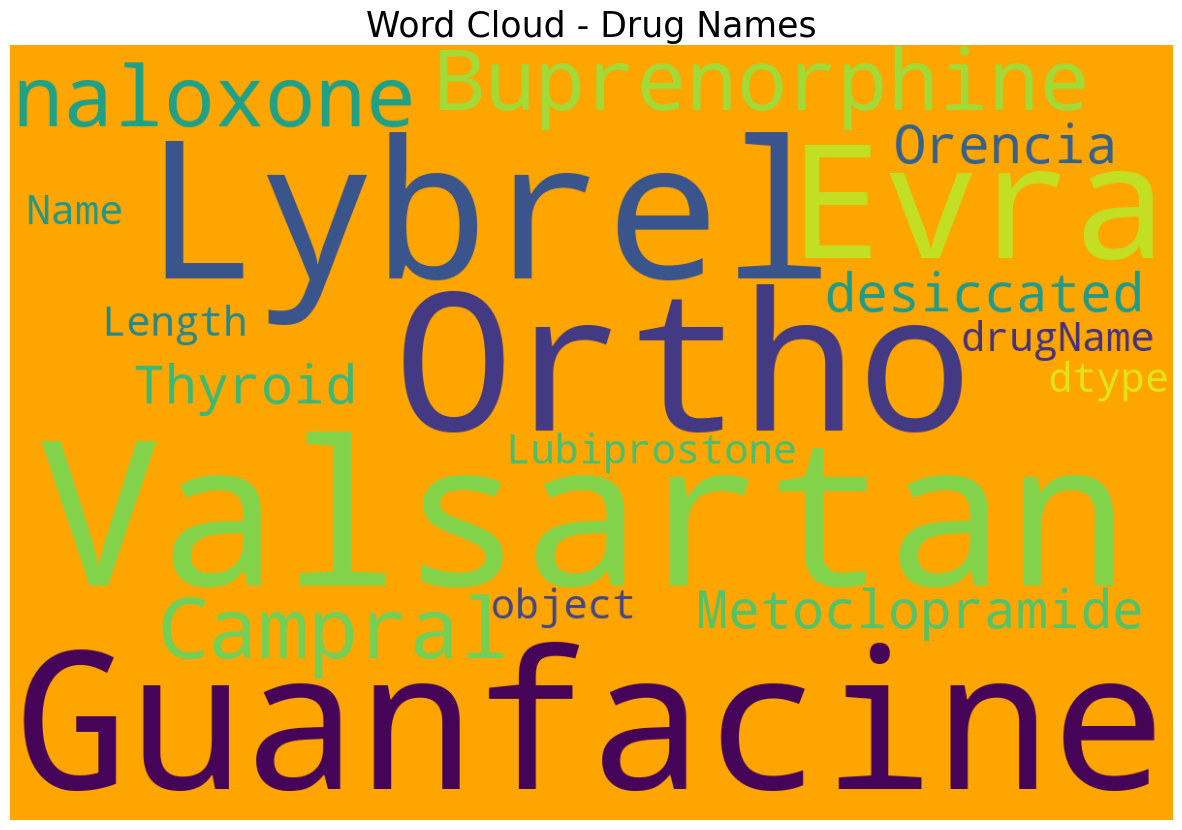

In [57]:
# let's see the words cloud for the reviews 

# most popular drugs

from wordcloud import WordCloud
from wordcloud import STOPWORDS

stopwords = set(STOPWORDS)

wordcloud = WordCloud(background_color = 'orange', stopwords = stopwords, width = 1200, height = 800).generate(str(data['drugName']))

plt.rcParams['figure.figsize'] = (15, 15)
plt.title('Word Cloud - Drug Names', fontsize = 25)
print(wordcloud)
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

<ul>
    <li style="font-size:150%;">This is a word cloud for the DRUG NAMES </li>
<ul>

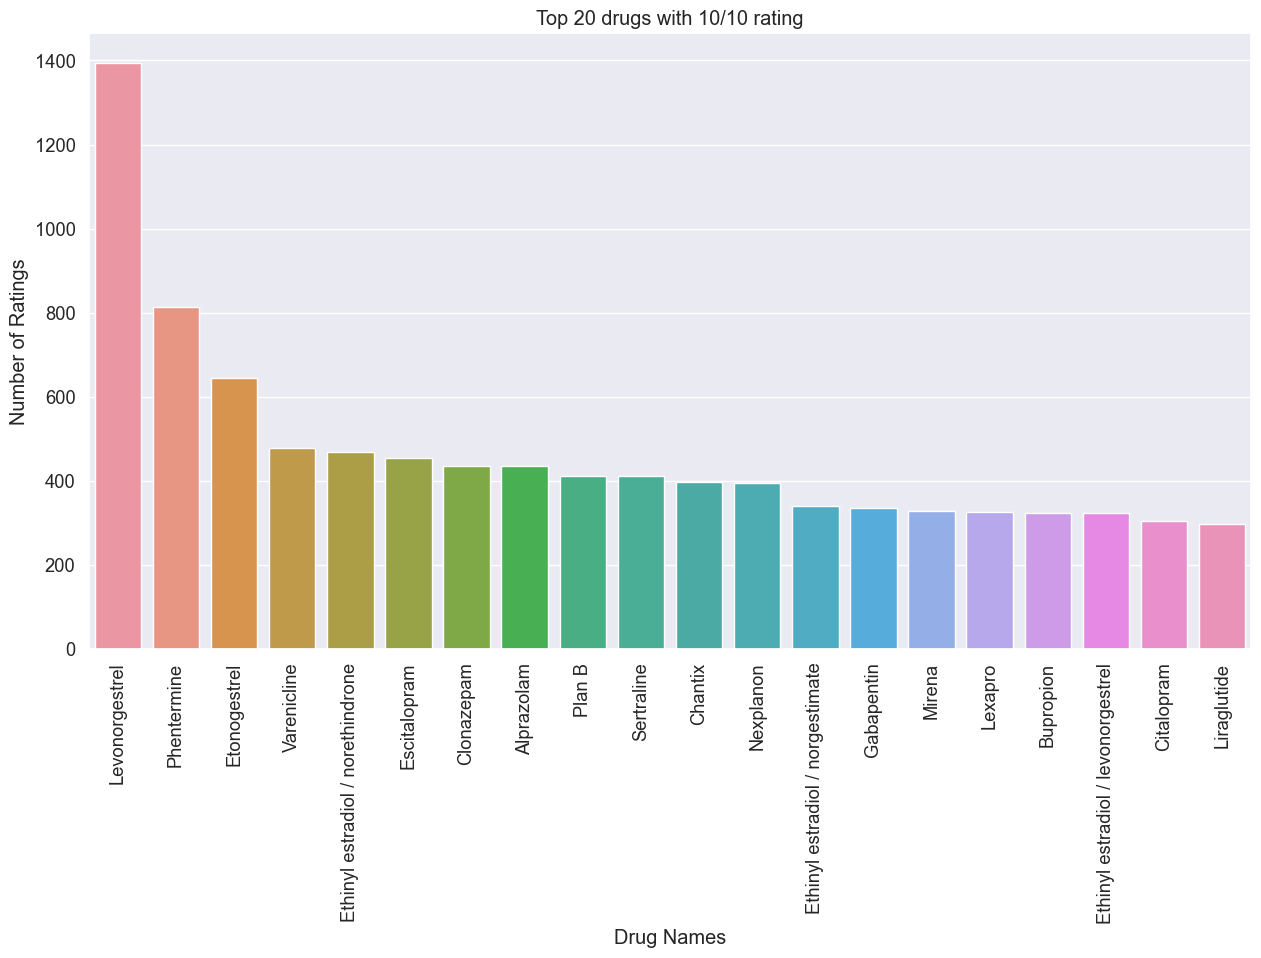

In [61]:
# This barplot shows the top 20 drugs with the 10/10 rating

# Setting the Parameter
sns.set(font_scale = 1.2, style = 'darkgrid')
plt.rcParams['figure.figsize'] = [15, 8]

rating = dict(data.loc[data.rating == 10, "drugName"].value_counts())
drugname = list(rating.keys())
drug_rating = list(rating.values())

sns_rating = sns.barplot(x = drugname[0:20], y = drug_rating[0:20])

sns_rating.set_title('Top 20 drugs with 10/10 rating')
sns_rating.set_ylabel("Number of Ratings")
sns_rating.set_xlabel("Drug Names")
plt.setp(sns_rating.get_xticklabels(), rotation=90);

In [39]:
# 15. Remove special characters and create Word Cloud
data['Cleaned_Review'] = data['review'].str.replace(r'[^a-zA-Z\s]', '')

wordcloud_cleaned = WordCloud(width=800, height=800,
                              background_color='white',
                              min_font_size=10).generate(" ".join(data['Cleaned_Review']))

C:\Users\KARPURAM\AppData\Local\Temp\ipykernel_18212\1958165169.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  data['Cleaned_Review'] = data['review'].str.replace(r'[^a-zA-Z\s]', '')


<ul>
    <li style="font-size:150%;">The is a bar graph which shows the top 20 drugs given in the data set with a rating of 10/10. 'Levonorgestrel' is the drug with the highest number of 10/10 ratings, about 1883 Ratings in the data set for 'Levonorgestrel'. </li>
<ul>

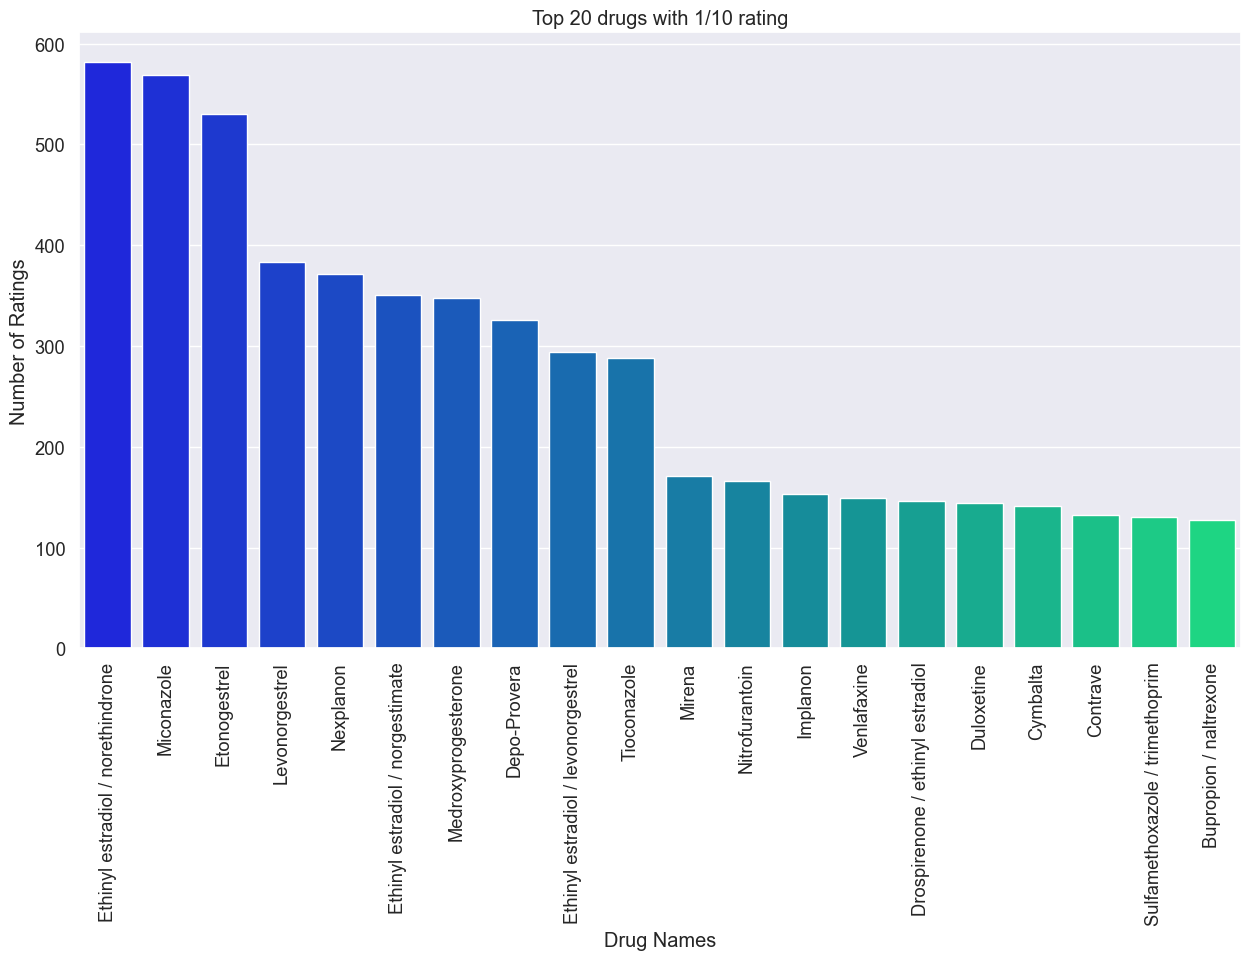

In [62]:
# This barplot shows the Top 20 drugs with the 1/10 rating

# Setting the Parameter
sns.set(font_scale = 1.2, style = 'darkgrid')
plt.rcParams['figure.figsize'] = [15, 8]

rating = dict(data.loc[data.rating == 1, "drugName"].value_counts())
drugname = list(rating.keys())
drug_rating = list(rating.values())

sns_rating = sns.barplot(x = drugname[0:20], y = drug_rating[0:20], palette = 'winter')

sns_rating.set_title('Top 20 drugs with 1/10 rating')
sns_rating.set_ylabel("Number of Ratings")
sns_rating.set_xlabel("Drug Names")
plt.setp(sns_rating.get_xticklabels(), rotation=90);

<ul>
    <li style="font-size:150%;">The is a bar graph thatshows the top 20 drugs given in the data set with a rating of 1/10. 'Miconazole' is the drug with the highest number of 1/10 ratings, about 767. </li>
<ul>

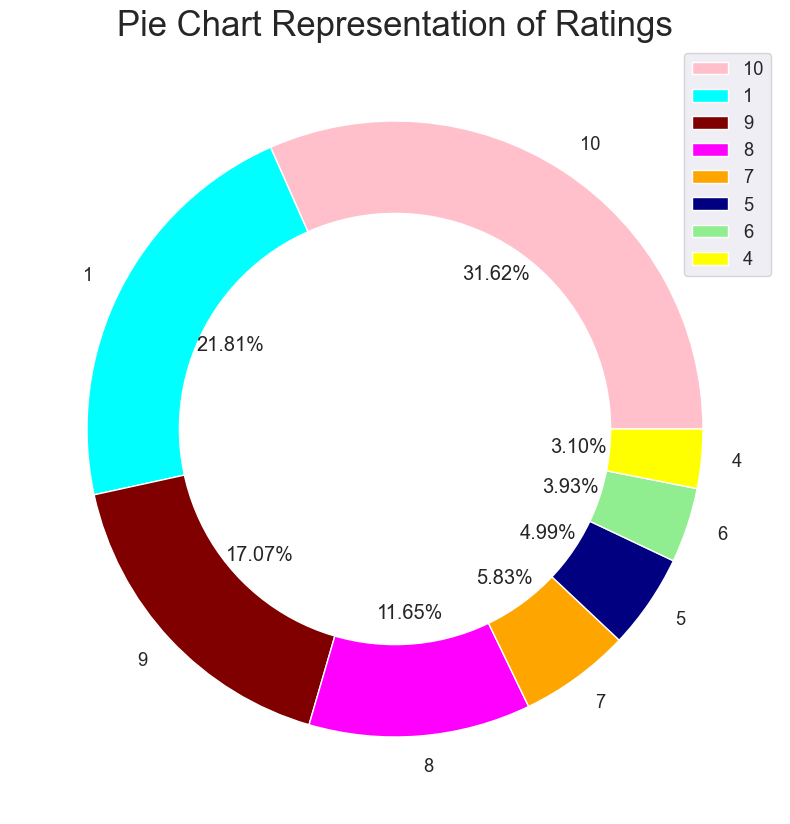

In [63]:
# making a donut chart to represent share of each ratings

size = [68005, 46901, 36708, 25046, 12547, 10723, 8462, 6671]
colors = ['pink', 'cyan', 'maroon',  'magenta', 'orange', 'navy', 'lightgreen', 'yellow']
labels = "10", "1", "9", "8", "7", "5", "6", "4"

my_circle = plt.Circle((0, 0), 0.7, color = 'white')

plt.rcParams['figure.figsize'] = (10, 10)
plt.pie(size, colors = colors, labels = labels, autopct = '%.2f%%')
plt.axis('off')
plt.title('Pie Chart Representation of Ratings', fontsize = 25)
p = plt.gcf()
plt.gca().add_artist(my_circle)
plt.legend()
plt.show()

In [40]:
data['Cleaned_Review']

0         It has no side effect I take it in combination...
1         My son is halfway through his fourth week of I...
2         I used to take another oral contraceptive whic...
3         This is my first time using any form of birth ...
4         Suboxone has completely turned my life around ...
                                ...                        
161292    I wrote my first report in MidOctober of   I h...
161293    I was given this in IV before surgey I immedia...
161294    Limited improvement after  months developed ba...
161295    Ive been on thyroid medication  years I spent ...
161296    Ive had chronic constipation all my adult life...
Name: Cleaned_Review, Length: 161297, dtype: object

In [41]:
# 17. Remove stop words and create Word Cloud
stop_words = set(stopwords.words("english"))
data['Cleaned_Review'] = data['Cleaned_Review'].apply(lambda x: " ".join([word for word in x.split() if word not in stop_words]))

wordcloud_cleaned_no_stopwords = WordCloud(width=800, height=800,
                                           background_color='white',
                                           min_font_size=10).generate(" ".join(data['Cleaned_Review']))


In [44]:
stop_words

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [45]:
data['Cleaned_Review']

0         It side effect I take combination Bystolic Mg ...
1         My son halfway fourth week Intuniv We became c...
2         I used take another oral contraceptive pill cy...
3         This first time using form birth control Im gl...
4         Suboxone completely turned life around I feel ...
                                ...                        
161292    I wrote first report MidOctober I alcohol sinc...
161293    I given IV surgey I immediately became anxious...
161294    Limited improvement months developed bad rash ...
161295    Ive thyroid medication years I spent first Syn...
161296    Ive chronic constipation adult life Tried Linz...
Name: Cleaned_Review, Length: 161297, dtype: object

In [46]:
wordcloud_cleaned_no_stopwords 

In [42]:
# 19. Create a new column by cleaning and removing special characters
data['Cleaned_Review_Short'] = data['Cleaned_Review'].apply(lambda x: " ".join([word for word in x.split() if len(word) > 2]))

In [47]:
data['Cleaned_Review_Short']

0            side effect take combination Bystolic Fish Oil
1         son halfway fourth week Intuniv became concern...
2         used take another oral contraceptive pill cycl...
3         This first time using form birth control glad ...
4         Suboxone completely turned life around feel he...
                                ...                        
161292    wrote first report MidOctober alcohol since po...
161293    given surgey immediately became anxious could ...
161294    Limited improvement months developed bad rash ...
161295    Ive thyroid medication years spent first Synth...
161296    Ive chronic constipation adult life Tried Linz...
Name: Cleaned_Review_Short, Length: 161297, dtype: object

In [43]:
# 21. Calculate sentiment scores
data['Polarity'] = data['Cleaned_Review_Short'].apply(lambda x: TextBlob(x).sentiment.polarity)
data['Subjectivity'] = data['Cleaned_Review_Short'].apply(lambda x: TextBlob(x).sentiment.subjectivity)

In [48]:
data['Polarity']

0         0.000000
1         0.148611
2         0.119805
3         0.219444
4         0.194444
            ...   
161292    0.261905
161293   -0.316667
161294   -0.223810
161295    0.201313
161296    0.104167
Name: Polarity, Length: 161297, dtype: float64

In [49]:
data['Subjectivity'] 

0         0.000000
1         0.436574
2         0.412771
3         0.591667
4         0.401389
            ...   
161292    0.454762
161293    0.916667
161294    0.369841
161295    0.483636
161296    0.533333
Name: Subjectivity, Length: 161297, dtype: float64

In [65]:
# Calculate sentiment scores using TextBlob
data['sentiment'] = data['review'].apply(lambda text: TextBlob(text).sentiment)

# Extract polarity and subjectivity scores
data['polarity'] = data['sentiment'].apply(lambda sentiment: sentiment.polarity)
data['subjectivity'] = data['sentiment'].apply(lambda sentiment: sentiment.subjectivity)

# Comments based on sentiment scores
positive_reviews = data[data['polarity'] > 0]
negative_reviews = data[data['polarity'] < 0]
neutral_reviews = data[data['polarity'] == 0]

num_positive = len(positive_reviews)
num_negative = len(negative_reviews)
num_neutral = len(neutral_reviews)

print("Number of positive reviews:", num_positive)
print("Number of negative reviews:", num_negative)
print("Number of neutral reviews:", num_neutral)

# Average sentiment polarity
average_polarity = data['polarity'].mean()
print("Average sentiment polarity:", average_polarity)

# Comments based on polarity
if average_polarity > 0:
    print("Overall sentiment is positive.")
elif average_polarity < 0:
    print("Overall sentiment is negative.")
else:
    print("Overall sentiment is neutral.")


Number of positive reviews: 101041
Number of negative reviews: 53303
Number of neutral reviews: 6953
Average sentiment polarity: 0.06484691918311754
Overall sentiment is positive.
